<a href="https://colab.research.google.com/github/fhfmendes04/Coursera_Capstone/blob/master/Bec_Precos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Explorátoria dos Preços na BEC.

In [1]:
# Bibliotecas 
## Manipulação dos dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns


# Pasta de Trabalho.
diretorio = '/content/drive/MyDrive/USP/MBA DS USP/TCC/Projeto_BEC/codar/BEC_Apriori/Saude/'

%load_ext google.colab.data_table

In [2]:
colunas = ['OC', 'Processo', 'Categoria_Item',
       'Codigo_Item', 'Desc_Item', 'Grupo_Item', 'Ano_Encerramento',
       'Mes_Ano_Encerramento', 'Mes_Encerramento',
       'Unidade', 'Secretaria',
       'Regiao',
       'Municipio', 'UGE',
       'Fornecedor', 'OC_Status',
       'Valor_Total_Referencia_Real_Homologado',
       'Valor_Total_Economia_Real_Homologado',
       'Valor_Unitario_Referencia_Real', 'Valor_Unitario_Negociado_Real',
       'Quantidade_Item', 'Valor_Total_Negociado_Real',
       'Quantidade_Negociada', 'Qtde_Item_Homologado',
       'Valor_Unitario_Negociado', 'Valor_Unitario_Economia_Homologado',
       'Modalidade', 'Ano_inicial', 'Mes_Ano_inicial', 'Mes_inicial']

arquivo = 'BEC_Preco_Referencia_Saude.csv'
df = pd.read_csv(diretorio + arquivo, dtype=str)
df.columns = colunas
df.head()

,OC,Processo,Categoria_Item,Codigo_Item,Desc_Item,Grupo_Item,Ano_Encerramento,Mes_Ano_Encerramento,Mes_Encerramento,Unidade,...,Quantidade_Item,Valor_Total_Negociado_Real,Quantidade_Negociada,Qtde_Item_Homologado,Valor_Unitario_Negociado,Valor_Unitario_Economia_Homologado,Modalidade,Ano_inicial,Mes_Ano_inicial,Mes_inicial
0,090037000012016OC00001,01846/2014,1 - MATERIAL,197971,ACIDO PICRICO CATEGORIA P.A.,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",2018,07/2018,Jul,"FRASCO 100,00 GRAMA",...,1,0,6,0,0,0,7 - PREGÃO ELETRÔNICO,2016,07/2016,JUL
1,090037000012016OC00001,01846/2014,1 - MATERIAL,415430,ACIDO SULFURICO P. A.,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",2018,07/2018,Jul,"FRASCO 1,00 LITRO",...,1,0,136,0,0,0,7 - PREGÃO ELETRÔNICO,2016,07/2016,JUL
2,090037000012016OC00001,01846/2014,1 - MATERIAL,945099,ACIDO OXALICO P. A.,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",2018,07/2018,Jul,FRASCO,...,1,0,5,0,0,0,7 - PREGÃO ELETRÔNICO,2016,07/2016,JUL
3,090037000012016OC00001,01846/2014,1 - MATERIAL,996700,"ACIDO TRICLOROACETICO CATEGORIA P.A.,","65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",2018,07/2018,Jul,"FRASCO 100,00 GRAMA",...,1,0,12,0,0,0,7 - PREGÃO ELETRÔNICO,2016,07/2016,JUL
4,090037000012016OC00001,01846/2014,1 - MATERIAL,1825810,ACIDO PERCLORICO CATEGORIA P.A,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",2018,07/2018,Jul,LITRO,...,1,0,2,0,0,0,7 - PREGÃO ELETRÔNICO,2016,07/2016,JUL


In [3]:
# Trabalharemos com OS _ Encerrado com Vencedor. 
df = df[(df['OC_Status']=='140 - ENCERRADO COM VENCEDOR') | (df['OC_Status']=='213 - ENCERRADA COM VENCEDOR')]

In [4]:
def muda_ponto(m):
  return m.replace(",", ".")

In [5]:
df['Valor_Unitario_Referencia_Real'] = df['Valor_Unitario_Referencia_Real'].apply(muda_ponto)
df['Valor_Unitario_Referencia_Real'] = df['Valor_Unitario_Referencia_Real'].astype(float)

df['Valor_Unitario_Economia_Homologado'] = df['Valor_Unitario_Economia_Homologado'].apply(muda_ponto)
df['Valor_Unitario_Economia_Homologado'] = df['Valor_Unitario_Economia_Homologado'].astype(float)

df['Valor_Unitario_Negociado'] = df['Valor_Unitario_Negociado'].apply(muda_ponto)
df['Valor_Unitario_Negociado'] = df['Valor_Unitario_Negociado'].astype(float)

df['Valor_Total_Referencia_Real_Homologado'] = df['Valor_Total_Referencia_Real_Homologado'].apply(muda_ponto)
df['Valor_Total_Referencia_Real_Homologado'] = df['Valor_Total_Referencia_Real_Homologado'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248301 entries, 0 to 294320
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   OC                                      248301 non-null  object 
 1   Processo                                248301 non-null  object 
 2   Categoria_Item                          248301 non-null  object 
 3   Codigo_Item                             248301 non-null  object 
 4   Desc_Item                               248301 non-null  object 
 5   Grupo_Item                              248301 non-null  object 
 6   Ano_Encerramento                        248301 non-null  object 
 7   Mes_Ano_Encerramento                    248301 non-null  object 
 8   Mes_Encerramento                        248301 non-null  object 
 9   Unidade                                 248301 non-null  object 
 10  Secretaria                              2483

In [6]:
# Maiores itens comercializados na BEC.
item_referencia = df.groupby(by=['Codigo_Item'])['Valor_Total_Referencia_Real_Homologado'].sum()
item_referencia = item_referencia.sort_values(ascending=False).head(20)
item_referencia

Codigo_Item
5135508    2.992421e+09
5072743    2.898551e+09
2058189    7.075955e+08
4580427    5.561412e+08
3882152    5.264935e+08
3250105    4.404223e+08
3674908    3.709193e+08
4687396    3.647385e+08
3386716    3.628257e+08
1828363    3.622138e+08
4424999    3.296622e+08
621838     3.142158e+08
4190432    3.126361e+08
3860531    2.811918e+08
5129028    2.679162e+08
1246585    2.533365e+08
3348431    2.455754e+08
5844169    2.450752e+08
280380     2.443752e+08
3674843    2.162031e+08
Name: Valor_Total_Referencia_Real_Homologado, dtype: float64

++++==========++++
Produto: ['GERAIS CAPTOPRIL 50MG,CAPS/CP/CP.REV,ORAL']
Valor Total de Licitação: 244375237.61071065
Unidades:
UNIDADE    18
Name: Unidade, dtype: int64
Modalidades:
7 - PREGÃO ELETRÔNICO    18
Name: Modalidade, dtype: int64
Valores por Ano: Ano_Encerramento
2018    4.235187e+04
2019    2.442994e+08
2020    8.455764e+01
2021    3.335471e+04
Name: Valor_Total_Referencia_Real_Homologado, dtype: float64
Valores por Fornedor Fornecedor
04192876000138 - CRISMED COMERCIAL HOSPITALAR LTDA.                       3.247172e+04
04851958000147 - R.P.4 DISTRIBUIDORA DE MEDICAMENTOS LTDA                 2.265852e+02
05005873000100 - PORTAL LTDA                                              4.072555e+04
12664453000100 - A7 DISTRIBUIDORA DE MEDICAMENTOS EIRELI                  2.442994e+08
14112327000160 - BIOFAC INDUSTRIA, COMERCIO E REPRESENTACAO EIRELI EPP    7.679853e+02
17756574000197 - MANZATOS FARMA EIRELI                                    1.454311e+03
49228695000152 - LUMAR C

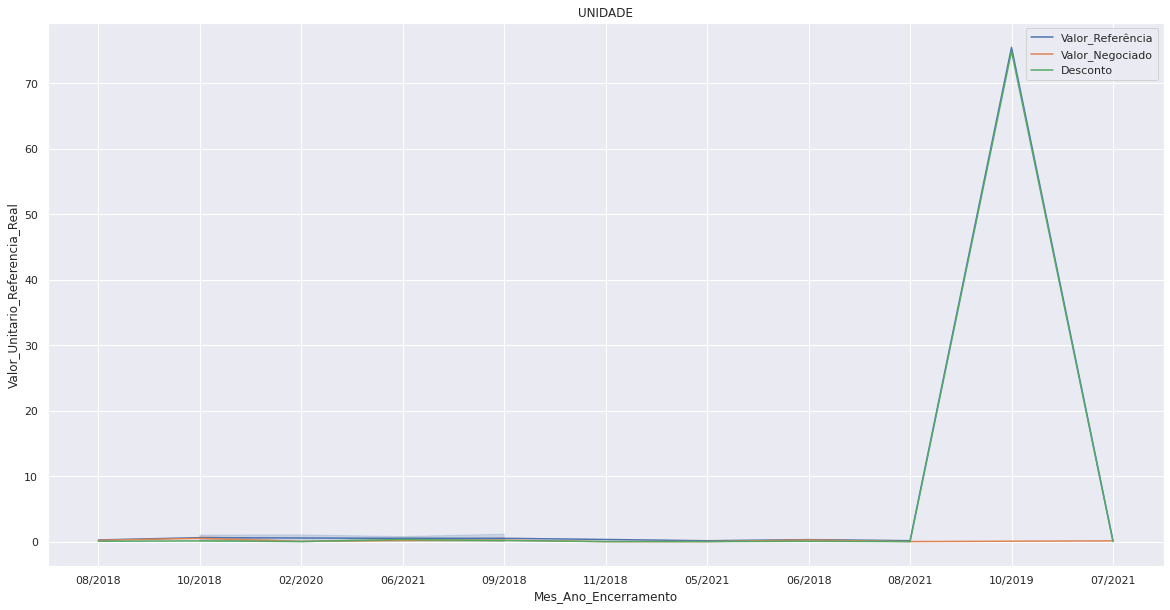

In [72]:
# Produto mais consumido
produto = '280380'
print("++++==========++++")
prod = df[df['Codigo_Item']== produto]['Desc_Item'].unique()
print("Produto:", prod)
print("Valor Total de Licitação:", df[df['Codigo_Item']== produto]['Valor_Total_Referencia_Real_Homologado'].sum())
print("Unidades:")
print(df[df['Codigo_Item']== produto]['Unidade'].value_counts())
print("Modalidades:")
print(df[df['Codigo_Item']== produto]['Modalidade'].value_counts())
print("Valores por Ano:", df[df['Codigo_Item']== produto][['Valor_Total_Referencia_Real_Homologado','Ano_Encerramento']].groupby(['Ano_Encerramento'])['Valor_Total_Referencia_Real_Homologado'].sum())
print("Valores por Fornedor", df[df['Codigo_Item']== produto][['Valor_Total_Referencia_Real_Homologado','Fornecedor']].groupby(['Fornecedor'])['Valor_Total_Referencia_Real_Homologado'].sum())
print(df[df['Codigo_Item']== produto]['UGE'].value_counts())
unidades = df[df['Codigo_Item']== produto]['Unidade'].unique()

sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))

for x in unidades:
  print(prod)
  g1 = df[(df['Codigo_Item']== produto) & (df['Unidade']== x)][['Valor_Unitario_Referencia_Real','Unidade', 'Mes_Ano_Encerramento']]
  sns.lineplot(x = "Mes_Ano_Encerramento", y = "Valor_Unitario_Referencia_Real", data = g1, label='Valor_Referência')
  g2 = df[(df['Codigo_Item']== produto) & (df['Unidade']== x)][['Valor_Unitario_Negociado','Unidade', 'Mes_Ano_Encerramento']]
  sns.lineplot(x = "Mes_Ano_Encerramento", y = "Valor_Unitario_Negociado", data = g2,  label='Valor_Negociado')
  g3 = df[(df['Codigo_Item']== produto) & (df['Unidade']== x)][['Valor_Unitario_Economia_Homologado','Unidade', 'Mes_Ano_Encerramento']]
  sns.lineplot(x = "Mes_Ano_Encerramento", y = "Valor_Unitario_Economia_Homologado", data = g3, label='Desconto')
  plt.title(x)
  plt.show()

In [84]:
rede = df[df['Codigo_Item']== produto]['Fornecedor'].unique()
rede_m =''
for r in rede:
  if (r[:3]!='Sem'):
    rede_m = f"{r[:14]};" + rede_m
rede_m

'04192876000138;12664453000100;05005873000100;14112327000160;17756574000197;49228695000152;66158742000158;04851958000147;'

In [73]:
OC_For = df[(df['Codigo_Item']== produto)]['Fornecedor'].unique()
for o in OC_For:
  mostra= df_bec[df_bec['Fornecedor']==o]
  mostra = pd.DataFrame(mostra['Status_Propostas'].value_counts())
  print(o)
  print(tabulate(mostra, headers = 'keys', tablefmt = 'psql'))

04851958000147 - R.P.4 DISTRIBUIDORA DE MEDICAMENTOS LTDA
+-------------------------------------------------------------------------------------------------+--------------------+
|                                                                                                 |   Status_Propostas |
|-------------------------------------------------------------------------------------------------+--------------------|
| 75 - CLASSIFICADA                                                                               |               4864 |
| 0 - VÁLIDO E CONFIRMADO                                                                         |               2815 |
| 4 - INVÁLIDO: NÃO ATINGIU A REDUÇÃO MÍNIMA ENTRE LANCES OU VALOR SUPERIOR A OUTRO JÁ REGISTRADO |                359 |
| 76 - DESCLASSIFICADA                                                                            |                112 |
| -1 - NÃO SE APLICA                                                                           

In [70]:
OC_Rel =df[(df['Codigo_Item']== produto)]['OC'].unique()
for o in OC_Rel:
  mostra= df_bec[(df_bec['OC']==o) & (df_bec['Codigo_Item']== produto)]
  mostra = pd.DataFrame(mostra[['Fornecedor', 'Status_Propostas', 'Status_OC']])
  print(o)
  print(tabulate(mostra, headers = 'keys', tablefmt = 'psql'))

090113000012019OC00193
+-------+---------------------------------------------------------------+--------------------+------------------------------+
|       | Fornecedor                                                    | Status_Propostas   | Status_OC                    |
|-------+---------------------------------------------------------------+--------------------+------------------------------|
| 92931 | 33009945000204 - PRODUTOS ROCHE QUÍMICOS E FARMACÊUTICOS S.A. | 75 - CLASSIFICADA  | 140 - ENCERRADO COM VENCEDOR |
+-------+---------------------------------------------------------------+--------------------+------------------------------+
090113000012019OC00287
+-------+---------------------------------------------------------------+--------------------+------------------------------+
|       | Fornecedor                                                    | Status_Propostas   | Status_OC                    |
|-------+---------------------------------------------------------------

In [55]:
df_bec[df_bec['OC']=='090126000012020OC00081']

,OC,Processo,Modalidade,Ano_Encerramento,Mês_Completo_Encerramento,CNPJ,Razão_Social,Fornecedor,UGE,Gestao,Secretaria,Grupo_Item,Cod_Des_Item,Codigo_Item,Desc_Item,Status_Propostas,Status_OC,Qt_Propostas_Lances,Unidade
277976,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,04307650001530,ONCO PROD DISTRIB. PROD. HOSP. ONCOLÓGICOS LTDA.,04307650001530 - ONCO PROD DISTRIB. PROD. HOSP...,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","5135508 - GERAIS NUSINERSENA 2,4 MG/ML, SOL IN...",5135508,"GERAIS NUSINERSENA 2,4 MG/ML, SOL INJ, AMP/FR ...",-1 - NÃO SE APLICA,140 - ENCERRADO COM VENCEDOR,0,"UNIDADE 5,00 MILILITRO"
277977,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,04307650001530,ONCO PROD DISTRIB. PROD. HOSP. ONCOLÓGICOS LTDA.,04307650001530 - ONCO PROD DISTRIB. PROD. HOSP...,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","5135508 - GERAIS NUSINERSENA 2,4 MG/ML, SOL IN...",5135508,"GERAIS NUSINERSENA 2,4 MG/ML, SOL INJ, AMP/FR ...",75 - CLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,"UNIDADE 5,00 MILILITRO"
277978,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,12420164000319,CM HOSPITALAR S.A.,12420164000319 - CM HOSPITALAR S.A.,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","3670430 - CONTROL SOMATROPINA 12UI(4MG), PO LI...",3670430,"CONTROL SOMATROPINA 12UI(4MG), PO LIOF INJ, A/...",0 - VÁLIDO E CONFIRMADO,140 - ENCERRADO COM VENCEDOR,3,UNIDADE UNIDADE
277979,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,12420164000319,CM HOSPITALAR S.A.,12420164000319 - CM HOSPITALAR S.A.,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","3670430 - CONTROL SOMATROPINA 12UI(4MG), PO LI...",3670430,"CONTROL SOMATROPINA 12UI(4MG), PO LIOF INJ, A/...",75 - CLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,UNIDADE UNIDADE
277980,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,44734671000151,CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151 - CRISTÁLIA PRODUTOS QUÍMICOS F...,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","3670430 - CONTROL SOMATROPINA 12UI(4MG), PO LI...",3670430,"CONTROL SOMATROPINA 12UI(4MG), PO LIOF INJ, A/...",-1 - NÃO SE APLICA,140 - ENCERRADO COM VENCEDOR,0,UNIDADE UNIDADE
277981,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,44734671000151,CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151 - CRISTÁLIA PRODUTOS QUÍMICOS F...,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","3670430 - CONTROL SOMATROPINA 12UI(4MG), PO LI...",3670430,"CONTROL SOMATROPINA 12UI(4MG), PO LIOF INJ, A/...",0 - VÁLIDO E CONFIRMADO,140 - ENCERRADO COM VENCEDOR,4,UNIDADE UNIDADE
277982,090126000012020OC00081,20168/2020,7 - PREGÃO ELETRÔNICO,2020,MAIO,44734671000151,CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151 - CRISTÁLIA PRODUTOS QUÍMICOS F...,090126 - DEPTO.REG.SAUDE DRS-XIII RIB.PRETO,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","3670430 - CONTROL SOMATROPINA 12UI(4MG), PO LI...",3670430,"CONTROL SOMATROPINA 12UI(4MG), PO LIOF INJ, A/...",75 - CLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,UNIDADE UNIDADE


In [71]:
OC_For = df[(df['Codigo_Item']== produto)]['Fornecedor'].unique()
for o in OC_For:
  mostra= df_bec[df_bec['Fornecedor']==o]
  print(tabulate(mostra, headers = 'keys', tablefmt = 'psql'))

+---------+------------------------+-------------+-----------------------+--------------------+-----------------------------+----------------+----------------------------------------------+---------------------------------------------------------------+-------------------------------------------------------+----------------------------------------+-----------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------------------+---------------+------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+------------------------------+-----------------------+-------------------------------------+
|         | OC                     | Processo    | Modalidade            |   Ano_Encerramento | Mês_Completo_Encerramento   |           CNPJ | Razão_Social                              

In [ ]:
 df[(df['Codigo_Item']== produto)]['Fornecedor'].unique()

array(['12420164000319 - CM HOSPITALAR S.A.',
       '04307650001298 - ONCO PROD DISTR. DE PROD. HOSP. E ONCOLÓGICOS LTDA',
       'Sem Vencedor', '51780468000268 - JANSSEN-CILAG FARMACÊUTICA LTDA',
       '09053134000226 - ELFA MEDICAMENTOS S.A.',
       '12420164000904 - CM HOSPITALAR S.A'], dtype=object)

In [15]:
colunas=['OC', 'Processo', 'Modalidade',
       'Ano_Encerramento', 'Mês_Completo_Encerramento', 'CNPJ',
       'Razão_Social', 'Fornecedor',
       'UGE', 'Gestao', 'Secretaria',
       'Grupo_Item', 'Cod_Des_Item', 'Codigo_Item', 'Desc_Item',
       'Status_Propostas', 'Status_OC',
       'Qt_Propostas_Lances', 'Unidade']
arquivo = 'BEC_OC_Fornecedor_Saude.csv'
df_bec = pd.read_csv(diretorio + arquivo, dtype=str)
df_bec.columns = colunas
df_bec= df_bec[df_bec['CNPJ']!='-1']
df_bec= df_bec[(df_bec['Status_OC']=='140 - ENCERRADO COM VENCEDOR') | (df_bec['Status_OC']=='213 - ENCERRADA COM VENCEDOR') ]
df_bec

,OC,Processo,Modalidade,Ano_Encerramento,Mês_Completo_Encerramento,CNPJ,Razão_Social,Fornecedor,UGE,Gestao,Secretaria,Grupo_Item,Cod_Des_Item,Codigo_Item,Desc_Item,Status_Propostas,Status_OC,Qt_Propostas_Lances,Unidade
15,090037000012016OC00001,01846/2014,7 - PREGÃO ELETRÔNICO,2018,JULHO,04879401000114,ARACA PROLAB PRODUTOS PARA LABORATORIOS EIRELI...,04879401000114 - ARACA PROLAB PRODUTOS PARA LA...,090037 - FED-INSTITUTO ADOLFO LUTZ,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",197971 - ACIDO PICRICO CATEGORIA P.A.,197971,ACIDO PICRICO CATEGORIA P.A.,76 - DESCLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,LITRO
16,090037000012016OC00001,01846/2014,7 - PREGÃO ELETRÔNICO,2018,JULHO,04879401000114,ARACA PROLAB PRODUTOS PARA LABORATORIOS EIRELI...,04879401000114 - ARACA PROLAB PRODUTOS PARA LA...,090037 - FED-INSTITUTO ADOLFO LUTZ,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",415430 - ACIDO SULFURICO P. A.,415430,ACIDO SULFURICO P. A.,75 - CLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,MILILITRO
17,090037000012016OC00001,01846/2014,7 - PREGÃO ELETRÔNICO,2018,JULHO,04879401000114,ARACA PROLAB PRODUTOS PARA LABORATORIOS EIRELI...,04879401000114 - ARACA PROLAB PRODUTOS PARA LA...,090037 - FED-INSTITUTO ADOLFO LUTZ,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",945099 - ACIDO OXALICO P. A.,945099,ACIDO OXALICO P. A.,76 - DESCLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,GRAMA
18,090037000012016OC00001,01846/2014,7 - PREGÃO ELETRÔNICO,2018,JULHO,04879401000114,ARACA PROLAB PRODUTOS PARA LABORATORIOS EIRELI...,04879401000114 - ARACA PROLAB PRODUTOS PARA LA...,090037 - FED-INSTITUTO ADOLFO LUTZ,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...","996700 - ACIDO TRICLOROACETICO CATEGORIA P.A.,",996700,"ACIDO TRICLOROACETICO CATEGORIA P.A.,",76 - DESCLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,"FRASCO 100,00 GRAMA"
19,090037000012016OC00001,01846/2014,7 - PREGÃO ELETRÔNICO,2018,JULHO,04879401000114,ARACA PROLAB PRODUTOS PARA LABORATORIOS EIRELI...,04879401000114 - ARACA PROLAB PRODUTOS PARA LA...,090037 - FED-INSTITUTO ADOLFO LUTZ,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",2030357 - BISSULFITO DE SODIO CATEGORIA P.A.,2030357,BISSULFITO DE SODIO CATEGORIA P.A.,76 - DESCLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,GRAMA GRAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174675,090205000012022OC00008,20220279552,7 - PREGÃO ELETRÔNICO,2022,JUNHO,25371614000100,HOFFMANNLAB PRODUTOS PARA LABORATÓRIO EIRELI EPP,25371614000100 - HOFFMANNLAB PRODUTOS PARA LAB...,090205 - GABINETE DO COORDENADOR,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",5768853 - CENTRIFUGA DE BANCADA 28 TUBOS ROTAC...,5768853,CENTRIFUGA DE BANCADA 28 TUBOS ROTACAO DE 800 ...,75 - CLASSIFICADA,140 - ENCERRADO COM VENCEDOR,1,UNIDADE
1174676,090205000012022OC00008,20220279552,7 - PREGÃO ELETRÔNICO,2022,JUNHO,33554685000177,LABINFARMA IND. E COM. DE EQUIP. MÉDICOS HOSPI...,33554685000177 - LABINFARMA IND. E COM. DE EQU...,090205 - GABINETE DO COORDENADOR,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - EQUIPAMENTOS E ARTIGOS DE USO MEDICO, ODO...",5768853 - CENTRIFUGA DE BANCADA 28 TUBOS ROTAC...,5768853,CENTRIFUGA DE BANCADA 28 TUBOS ROTACAO DE 800 ...,0 - VÁLIDO E CONFIRMADO,140 - ENCERRADO COM VENCEDOR,1,UNIDADE
1174677,090205000012022OC00008,20220279552,7 - PREGÃO ELETRÔNICO,2022,JUNHO,33554685000177,LABINFARMA IND. E COM. DE EQUIP. MÉDICOS HOSPI...,33554685000177 - LABINFARMA IND. E COM. DE EQU...,090205 - GABINETE DO COORDENADOR,00001 - GOVERNO DO ESTADO DE SAO PAULO,09000 - SECRETARIA DA SAUDE,"65 - E

In [40]:
df_bec[df_bec['Codigo_Item']=='5135508']['OC'].value_counts()

090126000012020OC00168    3
090126000012020OC00081    2
090132000012019OC00122    2
090126000012020OC00167    2
090126000012021OC00305    2
                         ..
090131000012019OC00001    1
090127000012020OC00073    1
090127000012019OC00318    1
090126000012019OC00278    1
090201000012021OC00144    1
Name: OC, Length: 80, dtype: int64

In [ ]:
OC_bec = df[(df['Codigo_Item']== produto)]['OC']
for o in OC_bec:
  mostra= df_bec[df_bec['OC']==o]
  print(tabulate(mostra, headers = 'keys', tablefmt = 'psql'))

+-------+------------------------+------------+-----------------------+--------------------+-----------------------------+----------------+----------------------------------------------------+---------------------------------------------------------------------+---------------------------------------------+----------------------------------------+-----------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------------------+---------------+------------------------------------------------------------------------+--------------------+------------------------------+-----------------------+-----------+
|       | OC                     | Processo   | Modalidade            |   Ano_Encerramento | Mês_Completo_Encerramento   |           CNPJ | Razão_Social                                       | Fornecedor                                                          | UGE                       

In [ ]:
# Carrrega o Dataframe do resumo.
#Elimina os parentes

df_res = pd.read_excel(diretorio + 'Resumo_Material_Saude_2018_2022_001.xlsx', dtype=str)
#df_res['Razao_Social'] = df_res['Razao_Social'].map(elimina)
df_res.head()

,CNPJ,Razao_Social,Quant_OC,Pregao,Dispensa,Convite,Classificada,Val_Confirmado,Válido,Desclassificada,Emp_2018,Emp_2019,Emp_2020,Emp_2021,Emp_2022,Um_Lance
0,11260846000187,ANBIOTON IMPORTADORA LTDA,377,365,0,12,358,255,0,11,4796427.010000001,7875906.63,4555693.840000001,4681351.310000001,1588555.04,359
1,15072183000128,ARTUR ARENQUE DA SILVA - ME,1170,895,0,275,878,543,0,30,70138.58,488227.04,947228.5700000001,1256555.33,319728.41,548
2,14112327000160,"BIOFAC INDUSTRIA, COMERCIO E REPRESENTACAO EIR...",374,360,0,14,354,315,0,15,3833747.79,8283162.340000001,2939946.31,3230596.56,317291.6,336
3,48791685000168,C.B.S. MEDICO CIENTIFICA S/A,804,738,0,66,731,643,0,12,21783775.53,25330636.9,20164203.2,14483712.41,6489476.59,671
4,13085369000196,CAPROMED FARMACEUTICA LTDA,1760,1634,0,126,1601,1516,0,81,876620.0499999999,1283176.5,1212463.25,1540746.67,491943.74,1296
